### Notebook to utilize show-attend-tell implementation based model for Image Captioning

#### This code is based on https://github.com/DeepRNN/image_captioning which is available under MIT License

__Author:__ Vibhor Jain

__Description:__ This notebook acts as the image captioning pipeline which is built on top of [show-attend-tell](https://arxiv.org/abs/1502.03044) implementation. 

The user can place all the input images under *test/images/* folder and the captioned images would be stored under *test/results/* folder.

__Dated:__ 03-Apr-2020

__Version:__ 1.0

In [1]:
# importing tensorflow as the DL library
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
import time

In [3]:
# importing all the custom libraries
from config import Config
from model import CaptionGenerator
from dataset import prepare_test_data

### Setting all configs

In [4]:
# initializing the config object required for starting the test phase.
# phase is set to 'test' as we want to generate captions for test images.
# beam_size is set to 3. More on beam_size here: https://opennmt.net/OpenNMT/translation/beam_search/
# pre-trained model is stored as 'show-attend-tell.npy'

config = Config()
config.phase = 'test'
config.beam_size = 3

model_file = 'show-attend-tell.npy'

### Initializing the tensorflow session

In [5]:
# initializing the tensorflow session

sess = tf.Session()

### Loading the Model

In [6]:
# loading the pre-trained model

model = CaptionGenerator(config)
model.load(sess, model_file)

Building the CNN...
CNN built.
Building the RNN...


  0%|          | 0/47 [00:00<?, ?it/s]

RNN built.
Loading the model from ./models/show-attend-tell.npy...


100%|██████████| 47/47 [00:06<00:00,  7.45it/s]

47 tensors loaded.


### Preparing the test data & generating the Image Captions for test images

In [7]:
# preparing the test data 

data, vocabulary = prepare_test_data(config)

Building the vocabulary...
Vocabulary built.
Number of words = 5000
Building the dataset...
Dataset built.


path:   0%|          | 0/9 [00:00<?, ?it/s]

Testing the model ...


path: 100%|██████████| 9/9 [24:24<00:00, 162.72s/it]


Testing complete.
Time taken for generating captions for 262 images: 1464.4713745117188


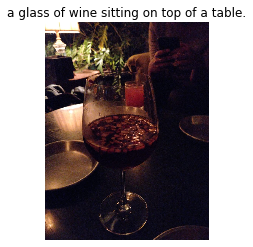

In [8]:
# this phase generates the captions for all the images stored under test/images folder.

_s = time.time()
model.test(sess, data, vocabulary)
_e = time.time()
print('Time taken for generating captions for 262 images: {}'.format(_e - _s))

# Demo for few sample captioned images

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [10]:
path = 'test/'
filename_suffix = '.jpg'

In [13]:
# this function randomly selects 5 images from the custom image dataset of 250+ images.
# Those randomly selected images are then plotted along with the captioned version of the same image.
# This way, we can compare the captions generated by the pipeline.

def display_sample_results():
    
    randomlist = random.sample(range(1, 250), 5)
    for i in randomlist:
        
        raw = plt.imread(os.path.join(path, 'images', str(i) + filename_suffix))
        captioned = plt.imread(os.path.join(path, 'results', str(i) +'_result'+ filename_suffix))
        
        f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(16, 12))
        plt.sca(axarr[0]); 
        plt.axis('off')
        plt.imshow(raw);
        plt.sca(axarr[1]); 
        plt.imshow(captioned);
        plt.axis('off')
        plt.show()

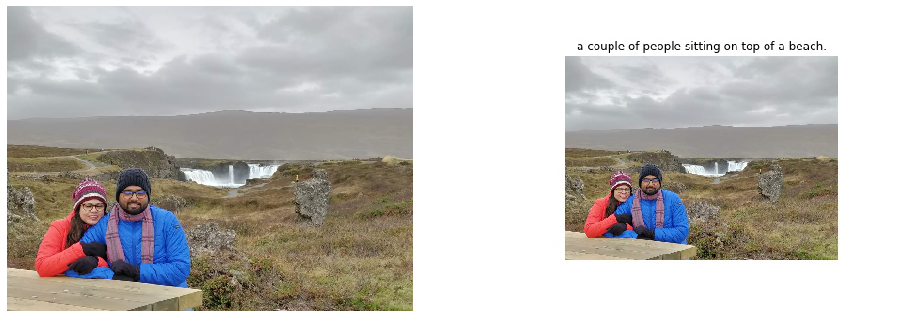

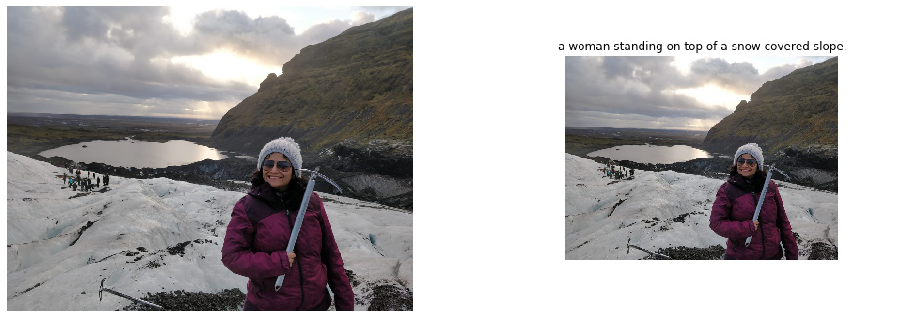

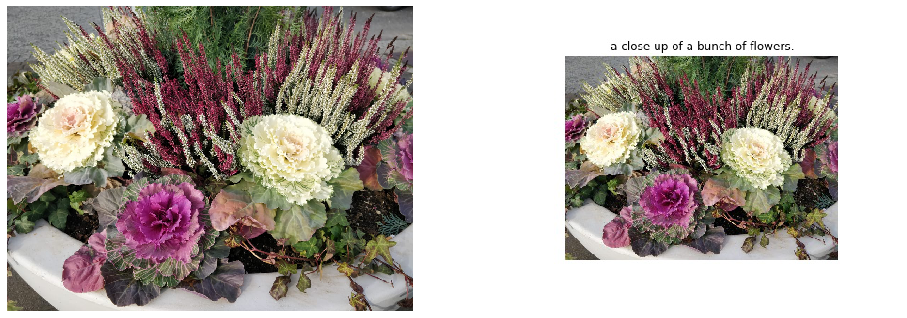

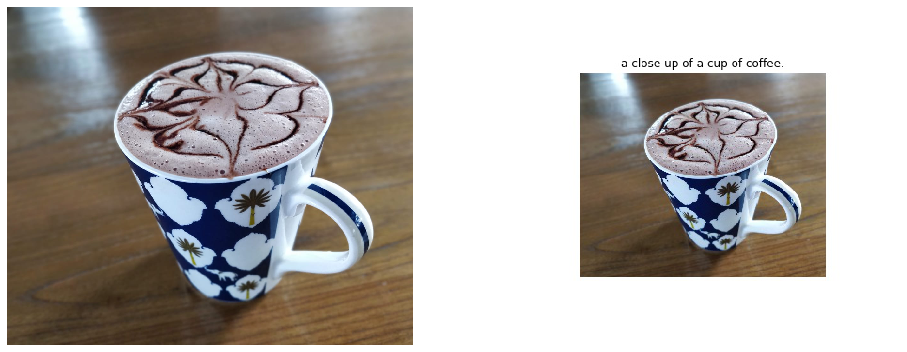

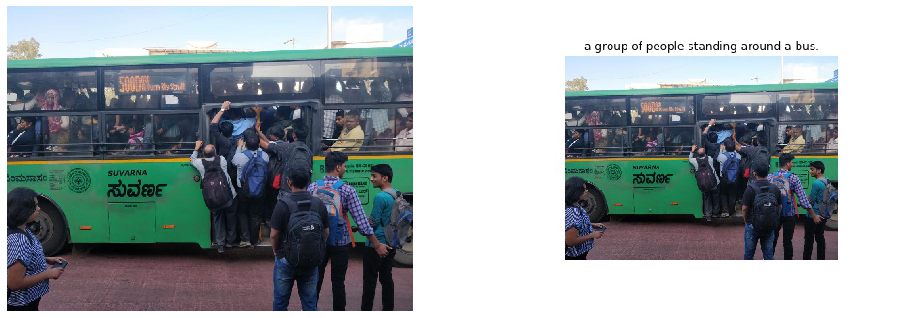

In [17]:
display_sample_results()